In [3]:
import copy
from rdkit.Chem import rdDepictor
from rdkit.Chem import rdFMCS
from rdkit import DataStructs
from rdkit import Chem
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import AllChem
from rdkit.Chem import Draw
from rdkit.Chem.rdmolops import ReplaceSidechains
import openbabel
import os
import pandas as pd
import numpy as np
from rdkit.Chem.Draw import rdMolDraw2D
from IPython.display import SVG,display_svg
IPythonConsole.drawOptions.addAtomIndices = True
IPythonConsole.molSize = 300,300
import matplotlib.pyplot as plt
import math
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier


RDKit WARNING: [16:22:13] Enabling RDKit 2019.09.3 jupyter extensions


In [4]:
#We would hope that  RDKit and the Smiles strings will give us the same atom indexing that was on the website.

def show_atom_number(mol):
    for atom in mol.GetAtoms():
        atom.SetAtomMapNum(atom.GetIdx()+1)
    return mol



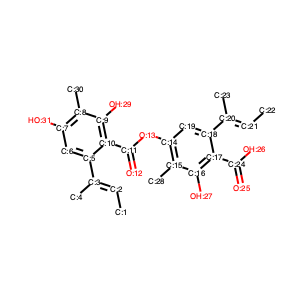

In [29]:

m = Chem.MolFromSmiles('CC=C(C)C1=CC(=C(C(=C1C(=O)OC2=C(C(=C(C(=C2)C(=CC)C)C(=O)O)O)C)O)C)O')
show_atom_number(m)

In [10]:
nmrData  = pd.read_csv('NMRDatum.csv',header= None)
nmrData = nmrData.replace(np.nan,0)

In [13]:
#Store data in array. Each index contains atom index, multiplicity and shift for a given substituted molecule.
numOfMolecules = int(np.shape(nmrData)[1])
SubstitutedMoleculesNMR = []
molecule = []
count = 0
for i in range(numOfMolecules+1):
    if len(molecule) == 2:
        print('\n') 
        print(molecule)
        count = count+1
        print('Length of molecule', count, 'is' , len(molecule));
        
        SubstitutedMoleculesNMR.append(molecule)
        molecule = []
        if i< 32:
            data = nmrData[i]
            #data = [x for x in data if pd.isnull(x) == False]
            data = [float(s) for s in data]
            molecule.append(data)
    else:
        if i< 32:
            data = nmrData[i]
            #data = [x for x in data if pd.isnull(x) == False]
            data = [float(s) for s in data]
            molecule.append(data)
            print('\n')  
            print(data)




[128.5, 128.5, 128.5, 128.5, 128.5, 128.5, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


[50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


[[128.5, 128.5, 128.5, 128.5, 128.5, 128.5, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]]
Length of molecule 1 is 2


[50.0, 10.0, 10.0, 85.0

In [18]:
SubstitutedMoleculesNMR = np.array(SubstitutedMoleculesNMR)
nsamples, nx, ny = SubstitutedMoleculesNMR.shape
d2_train_dataset = SubstitutedMoleculesNMR.reshape((nsamples,nx*ny))
d2_train_dataset

array([[128.5 , 128.5 , 128.5 , ...,   0.  ,   0.  ,   0.  ],
       [108.4 , 159.8 , 109.4 , ...,   0.  ,   0.  ,   0.  ],
       [ 95.68,  96.13, 109.41, ...,   0.  ,   0.  ,   0.  ],
       ...,
       [ 76.4 ,  53.9 ,  57.  , ...,   0.  ,   0.  ,   0.  ],
       [ 80.8 ,  40.  ,  40.  , ...,   0.  ,   0.  ,   0.  ],
       [134.3 , 108.  , 160.1 , ...,   0.  ,   0.  ,   0.  ]])

In [15]:
ind = int(numOfMolecules/2)
PhenylPresence = np.ones(ind) #Create output vector for the molecules, 
                                         #indicating presence or absence of phenyl group


In [16]:
print(PhenylPresence.shape)
SubstitutedMoleculesNMR.shape

(16,)


(16, 2, 45)

In [19]:
X_train, X_test, y_train, y_test = train_test_split(
             d2_train_dataset, PhenylPresence, test_size = 0.2, random_state=42)
 
neighbors = np.arange(1, 9)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))
 
# Loop over K values
for i, k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
     
    # Compute training and test data accuracy
    train_accuracy[i] = knn.score(X_train, y_train)
    test_accuracy[i] = knn.score(X_test, y_test)
 

In [ ]:
nb = GaussianNB()